## Miniproject 2: MovieLens Visualization



### Download data

In [ ]:
import requests
!pip install scikit-surprise
!pip install adjustText

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv',
     'train.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/train.csv',
     'test.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/test.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')
download_file('train.csv')
download_file('test.csv')

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505180 sha256=f8c39f525a499658afac135b13540decdd395a56d7ff92c7b6e4de2b6d661891
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# BASIC VISUALIZATIONS (20 PTS)




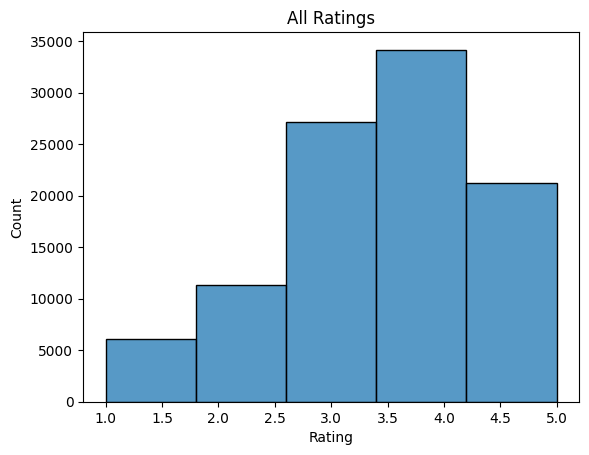

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize all ratings
sns.histplot(data['Rating'], bins = 5)
plt.title('All Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

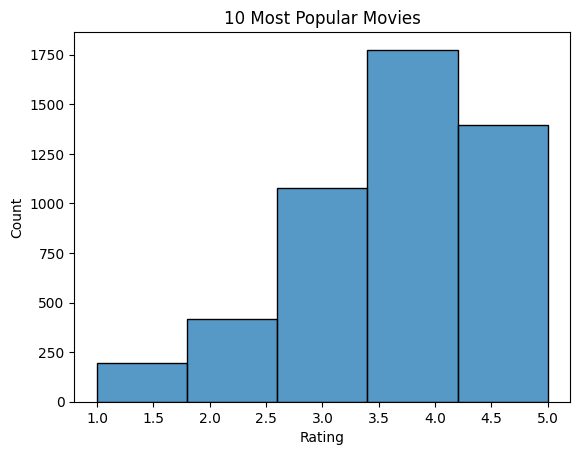

In [ ]:
# 10 most popular
movie_counts = data['Movie ID'].value_counts()

popular_movies = movie_counts.head(10).index
popular_ratings = data[data['Movie ID'].isin(popular_movies)]

sns.histplot(popular_ratings['Rating'], bins=5)
plt.title('10 Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
data.head(10)

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [ ]:
#check
print(popular_ratings['Movie ID'].unique())

[  1 100 181 288 294 258 286  50 121 300]


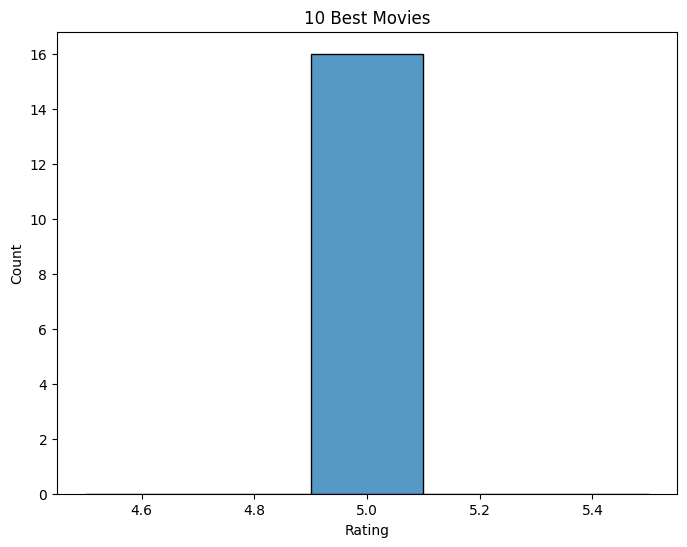

In [ ]:
# top 10 movies

average_ratings = data.groupby('Movie ID')['Rating'].mean()
sorted = average_ratings.sort_values(ascending=False)
top_10 = sorted.head(10)

movie_ids = top_10.index.tolist()
ratings = data[data['Movie ID'].isin(movie_ids)]
plt.figure(figsize=(8,6))
sns.histplot(ratings['Rating'], bins=5)
plt.title('10 Best Movies')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

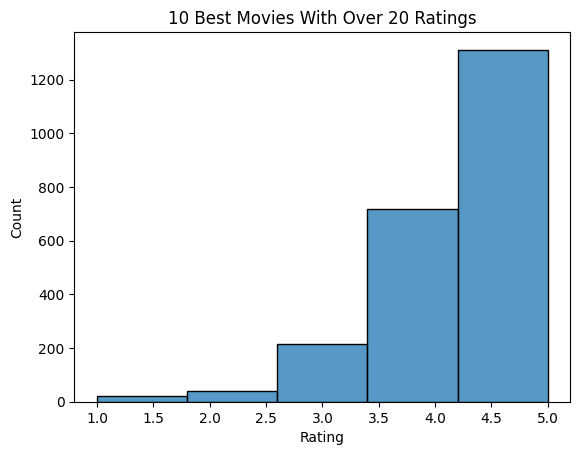

In [ ]:
#just finding best 10 movies histogram didin't tell much so decided to choose 10 best movies with at least 20 ratings

stats = data.groupby('Movie ID').agg({'Rating': ['mean', 'count']})
stats.columns = ['Average Rating', 'Rating Count']

#keeping only movies w over 20
movies_filtered = stats[stats['Rating Count'] >= 20]

#same code as before
sorted = movies_filtered.sort_values('Average Rating', ascending=False)
top_10 = sorted.head(10)
movie_ids = top_10.index.tolist()
ratings = data[data['Movie ID'].isin(movie_ids)]

sns.histplot(ratings['Rating'], bins=5)
plt.title('10 Best Movies With Over 20 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
print(movies.columns)

Index(['Movie ID', 'Movie Title', 'Unknown', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


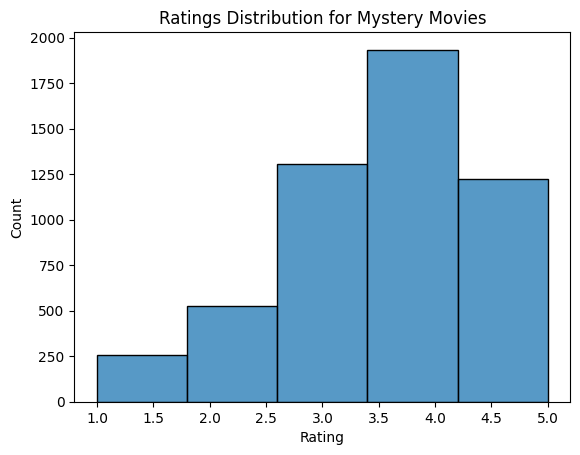

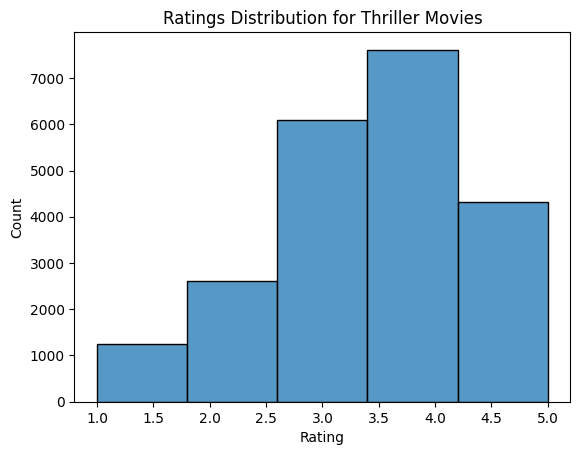

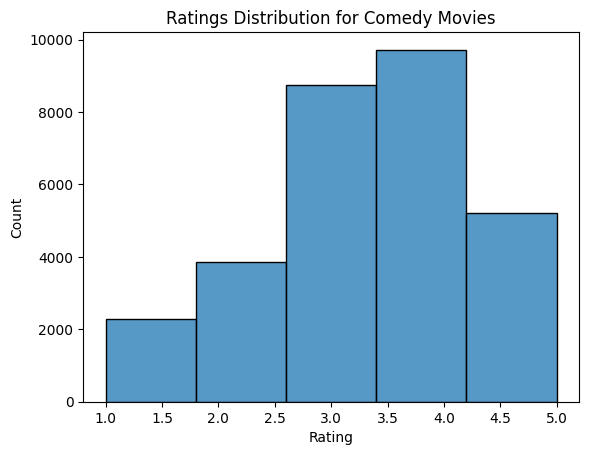

In [ ]:
# visualize w Mystery, Thriller, and Comedy

#merge dataframes
data_movies = pd.merge(data, movies, on='Movie ID')

# Select three genres
genres = ['Mystery', 'Thriller', 'Comedy']

for genre in genres:
    genre_ratings = data_movies[data_movies[genre] == 1]['Rating']
    sns.histplot(genre_ratings, bins=5)
    plt.title(f'Ratings Distribution for {genre} Movies')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()


In [ ]:
data_movies.head(15)

,User ID,Movie ID,Rating,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,L.A. Confidential (1997),0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,Heavyweights (1994),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,Legends of the Fall (1994),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,Jackie Brown (1997),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,115,265,2,"Hunt for Red October, The (1990)",0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,253,465,5,"Jungle Book, The (1994)",0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,305,451,3,Grease (1978),0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
9,6,86,3,"Remains of the Day, The (1993)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Matrix Factorization Visualizations [60 points]

Homework 1 method:

In [ ]:
from scipy.sparse.linalg import svds
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = reg*Ui - Vj*(Yij - np.matmul(Vj,Ui))
    return eta * grad

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = reg*Vj - Ui*(Yij - np.matmul(Vj,Ui))
    return eta * grad

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err_total = 0
    for i, j, Yij in Y:
        err = 0.5*(Yij - np.dot(U[i - 1], V[j - 1]))**2
        err_total += err
    return err_total/len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    n = Y.shape[0]
    U = np.random.uniform(-0.5, 0.5, size=(M, K))
    V = np.random.uniform(-0.5, 0.5, size=(N, K))
    prev_err = get_err(U, V, Y, reg)
    first_err = prev_err
    for k in range(max_epochs):
      indices = np.random.permutation(n)
      Y_shuffled = Y[indices]
      for i, j, Yij in Y_shuffled:
        dU = grad_U(U[i - 1], Yij, V[j - 1], reg, eta)
        U[i - 1] -= dU
        dV = grad_V(V[j - 1], Yij, U[i - 1], reg, eta)
        V[j - 1] -= dV
      err = get_err(U, V, Y_shuffled, reg)
      if k == 0:
        first_err = err - prev_err
      else:
        expr = (err - prev_err)/first_err
        if expr <= eps:
          return U, V, err
        prev_err = err
    return U, V, err

m = 943
n = 1682
Y_train = train[['User ID', 'Movie ID', 'Rating']].values
Y_test = test[['User ID', 'Movie ID', 'Rating']].values
U, V, err = train_model(m, n, 20, 0.03, 0.1, Y_train)
print(f"training error: {err}")
err_test = get_err(U, V, Y_test)
print(f"test error: {err_test}")
A, Sigma, B_T = svds(V.T, k=2)

training error: 0.29866818069007367
test error: 0.44742202115872726


Homework 1 method with bias for global trends:

In [ ]:
def grad_U_bias(Ui, Yij, Vj, reg, eta, mu, bu, bm):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    # grad = reg*Ui - Vj*(Yij - np.matmul(Vj,Ui))
    error = Yij - (mu + bu + bm + np.dot(Ui, Vj))
    grad = reg * Ui - Vj * error
    return eta * grad

def grad_V_bias(Vj, Yij, Ui, reg, eta, mu, bu, bm):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    # grad = reg*Vj - Ui*(Yij - np.matmul(Vj,Ui))
    error = Yij - (mu + bu + bm + np.dot(Ui, Vj))
    grad = reg * Vj - Ui * error
    return eta * grad

def get_err_bias(U, V, Y, mu, user_bias, movie_bias, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    err_total = 0
    for i, j, Yij in Y:
        #err = 0.5*(Yij - np.dot(U[i - 1], V[j - 1]))**2
        pred = mu + user_bias[i - 1] + movie_bias[j - 1] + np.dot(U[i - 1], V[j - 1])
        err = 0.5 * (Yij - pred) ** 2
        err_total += err
    return err_total/len(Y)

def train_model_bias(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    n = Y.shape[0]
    U = np.random.uniform(-0.5, 0.5, size=(M, K))
    V = np.random.uniform(-0.5, 0.5, size=(N, K))
    mu = np.mean(Y[:, 2])
    user_bias = np.zeros(M)
    movie_bias = np.zeros(N)

    prev_err = get_err_bias(U, V, Y, mu, user_bias, movie_bias, reg)
    first_err = prev_err
    for k in range(max_epochs):
      indices = np.random.permutation(n)
      Y_shuffled = Y[indices]
      for i, j, Yij in Y_shuffled:

        error = Yij - (mu + user_bias[i - 1] + movie_bias[j - 1] + np.dot(U[i - 1], V[j - 1]))
        user_bias[i - 1] += eta * (error - reg * user_bias[i - 1])
        movie_bias[j - 1] += eta * (error - reg * movie_bias[j - 1])

        dU = grad_U_bias(U[i - 1], Yij, V[j - 1], reg, eta, mu, user_bias[i - 1], movie_bias[j-1])
        U[i - 1] -= dU
        dV = grad_V_bias(V[j - 1], Yij, U[i - 1], reg, eta, mu, user_bias[i - 1], movie_bias[j - 1])
        V[j - 1] -= dV
      err = get_err_bias(U, V, Y_shuffled, mu, user_bias, movie_bias, reg)
      if k == 0:
        first_err = err - prev_err
      else:
        expr = (err - prev_err)/first_err
        if expr <= eps:
          return U, V, user_bias, movie_bias, err
        prev_err = err
    return U, V, user_bias, movie_bias, err

m = 943
n = 1682
Y_train = train[['User ID', 'Movie ID', 'Rating']].values
Y_test = test[['User ID', 'Movie ID', 'Rating']].values
U_bias, V_bias, ub, mb, err = train_model_bias(m, n, 20, 0.03, 0.1, Y_train)
print(f"training error: {err}")
err_test = get_err_bias(U_bias, V_bias, Y_test, np.mean(Y_train[:, 2]), ub, mb)
print(f"test error: {err_test}")
A_bias, Sigma, B_T = svds(V_bias.T, k=2)

training error: 0.2607651833058745
test error: 0.41920969260048524


off-the shelf method (surprise svd):

In [ ]:
import surprise
from surprise import SVD, Dataset, Reader, accuracy
from surprise import SVDpp
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(train, reader)
trainset = data_train.build_full_trainset()

model = SVD(n_factors=50, n_epochs=100, lr_all=0.05, reg_all=0.1, biased=True)
model.fit(trainset)
testset = list(zip(test["User ID"].values, test["Movie ID"].values, test["Rating"].values))
trainset_pred = model.test(trainset.build_testset())
accuracy.rmse(trainset_pred)
predictions = model.test(testset)
accuracy.rmse(predictions)
V_surprise = model.qi
A_surprise, _, _ = svds(V_surprise.T, k=2)

RMSE: 0.6657
RMSE: 0.9180


graphs for randomly chosen movies:

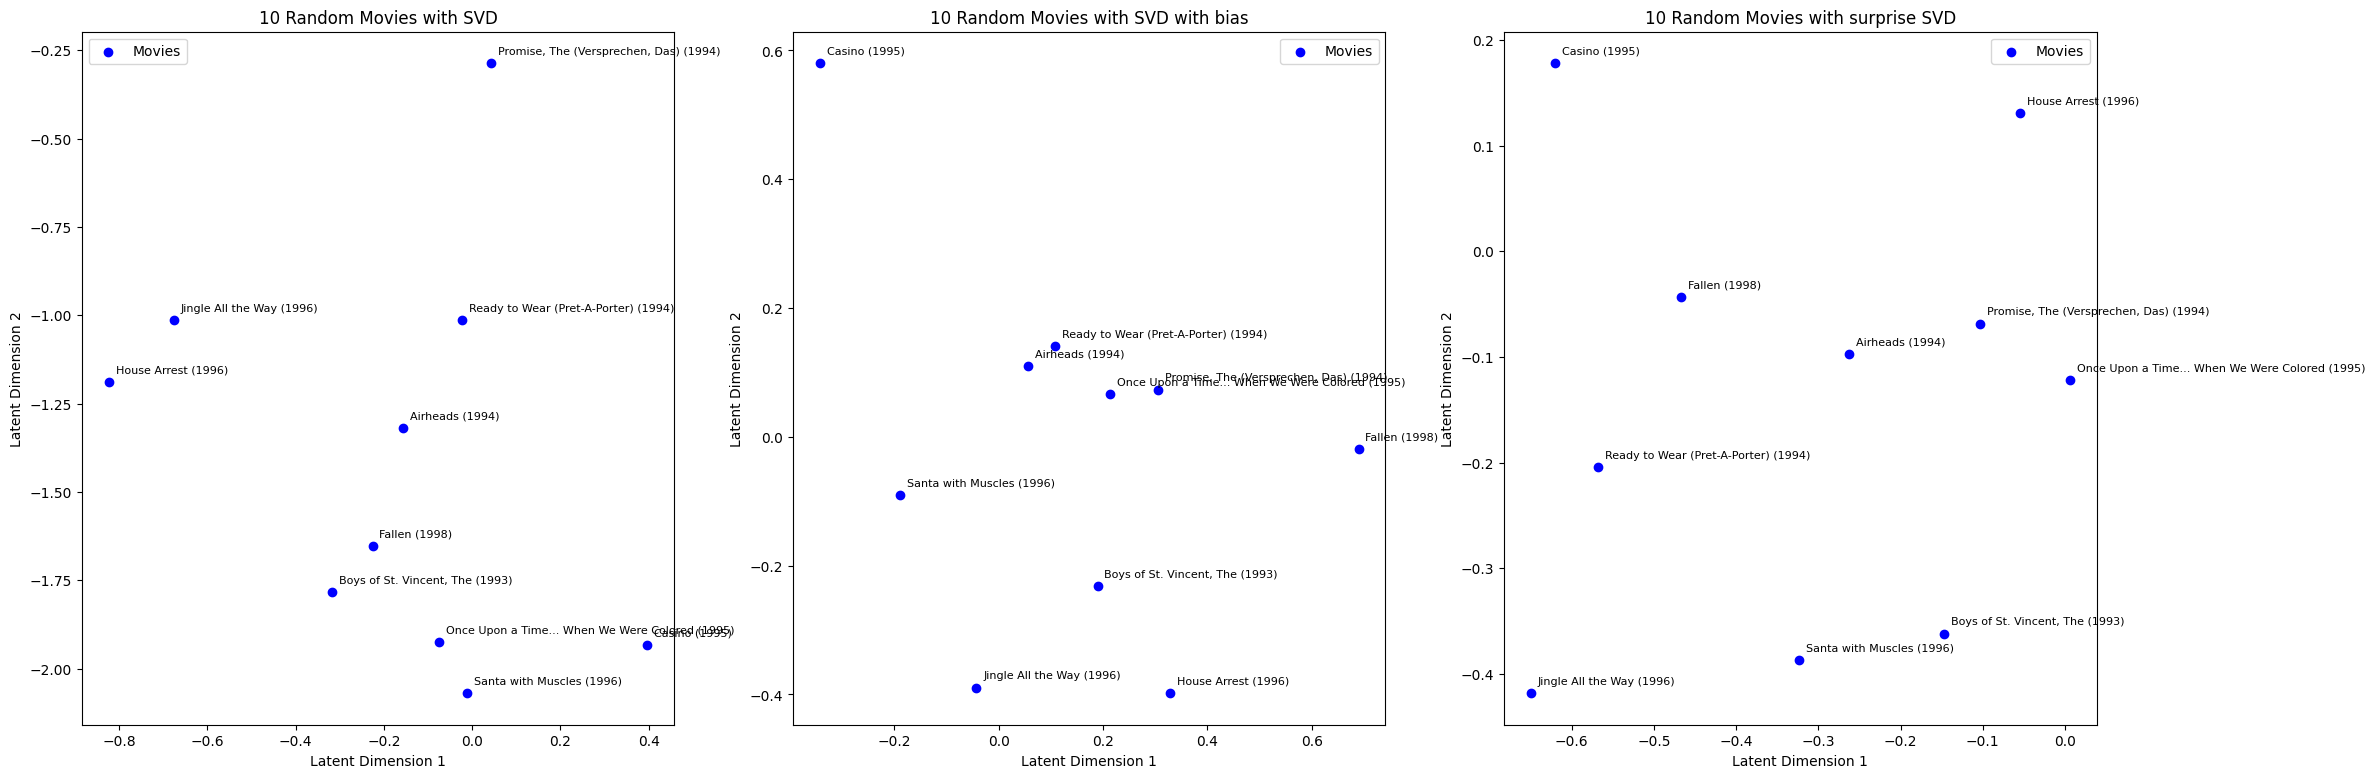

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
from adjustText import adjust_text
def plot_movies(ax, movie_subset, labels, title, A, V):
    plt.figure(figsize=(8, 6))
    V_tilde = V @ A
    ax.scatter(V_tilde[movie_subset, 0], V_tilde[movie_subset, 1], color='blue', label='Movies')

    for i, label in enumerate(labels):
      ax.annotate(label,
                  (V_tilde[movie_subset[i], 0], V_tilde[movie_subset[i], 1]),
                  fontsize=8,
                  textcoords="offset points",
                  xytext=(5, 5),
                  ha='left',
                  va='bottom')
    ax.set_xlabel("Latent Dimension 1")
    ax.set_ylabel("Latent Dimension 2")
    ax.set_title(title)
    ax.legend()
   #ax.show()

idxs_random = np.random.choice(n, size=10, replace=False)
rand_labels = [movies['Movie Title'][i] for i in idxs_random]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 9))

plot_movies(axes[0], idxs_random, rand_labels, "10 Random Movies with SVD", A, V)
plot_movies(axes[1], idxs_random, rand_labels, "10 Random Movies with SVD with bias", A_bias, V_bias)
plot_movies(axes[2], idxs_random, rand_labels, "10 Random Movies with surprise SVD", A_surprise, V_surprise)

plt.tight_layout()
plt.show()

graphs for most popular movies:

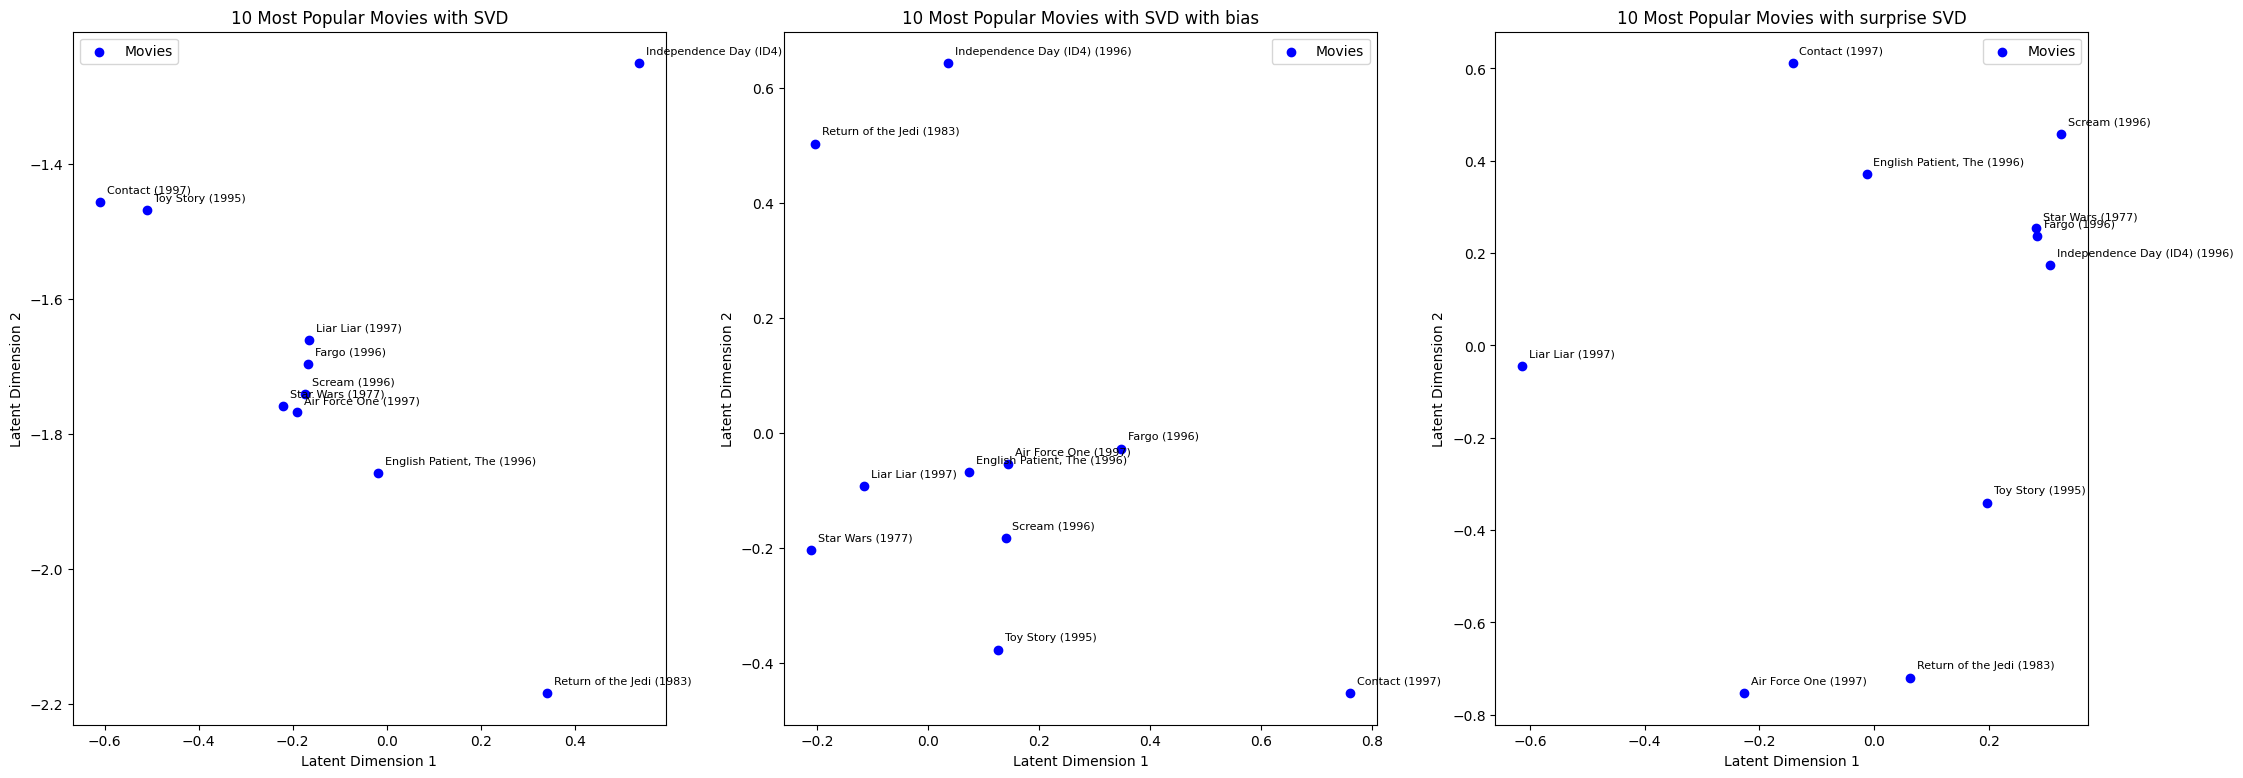

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
idxs_popular = popular_movies.to_list()
popular_labels = [movies['Movie Title'][i - 1] for i in idxs_popular]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 9))
plot_movies(axes[0], idxs_popular, popular_labels, "10 Most Popular Movies with SVD", A, V)
plot_movies(axes[1], idxs_popular, popular_labels, "10 Most Popular Movies with SVD with bias", A_bias, V_bias)
plot_movies(axes[2], idxs_popular, popular_labels, "10 Most Popular Movies with surprise SVD", A_surprise, V_surprise)

graphs for best movies:

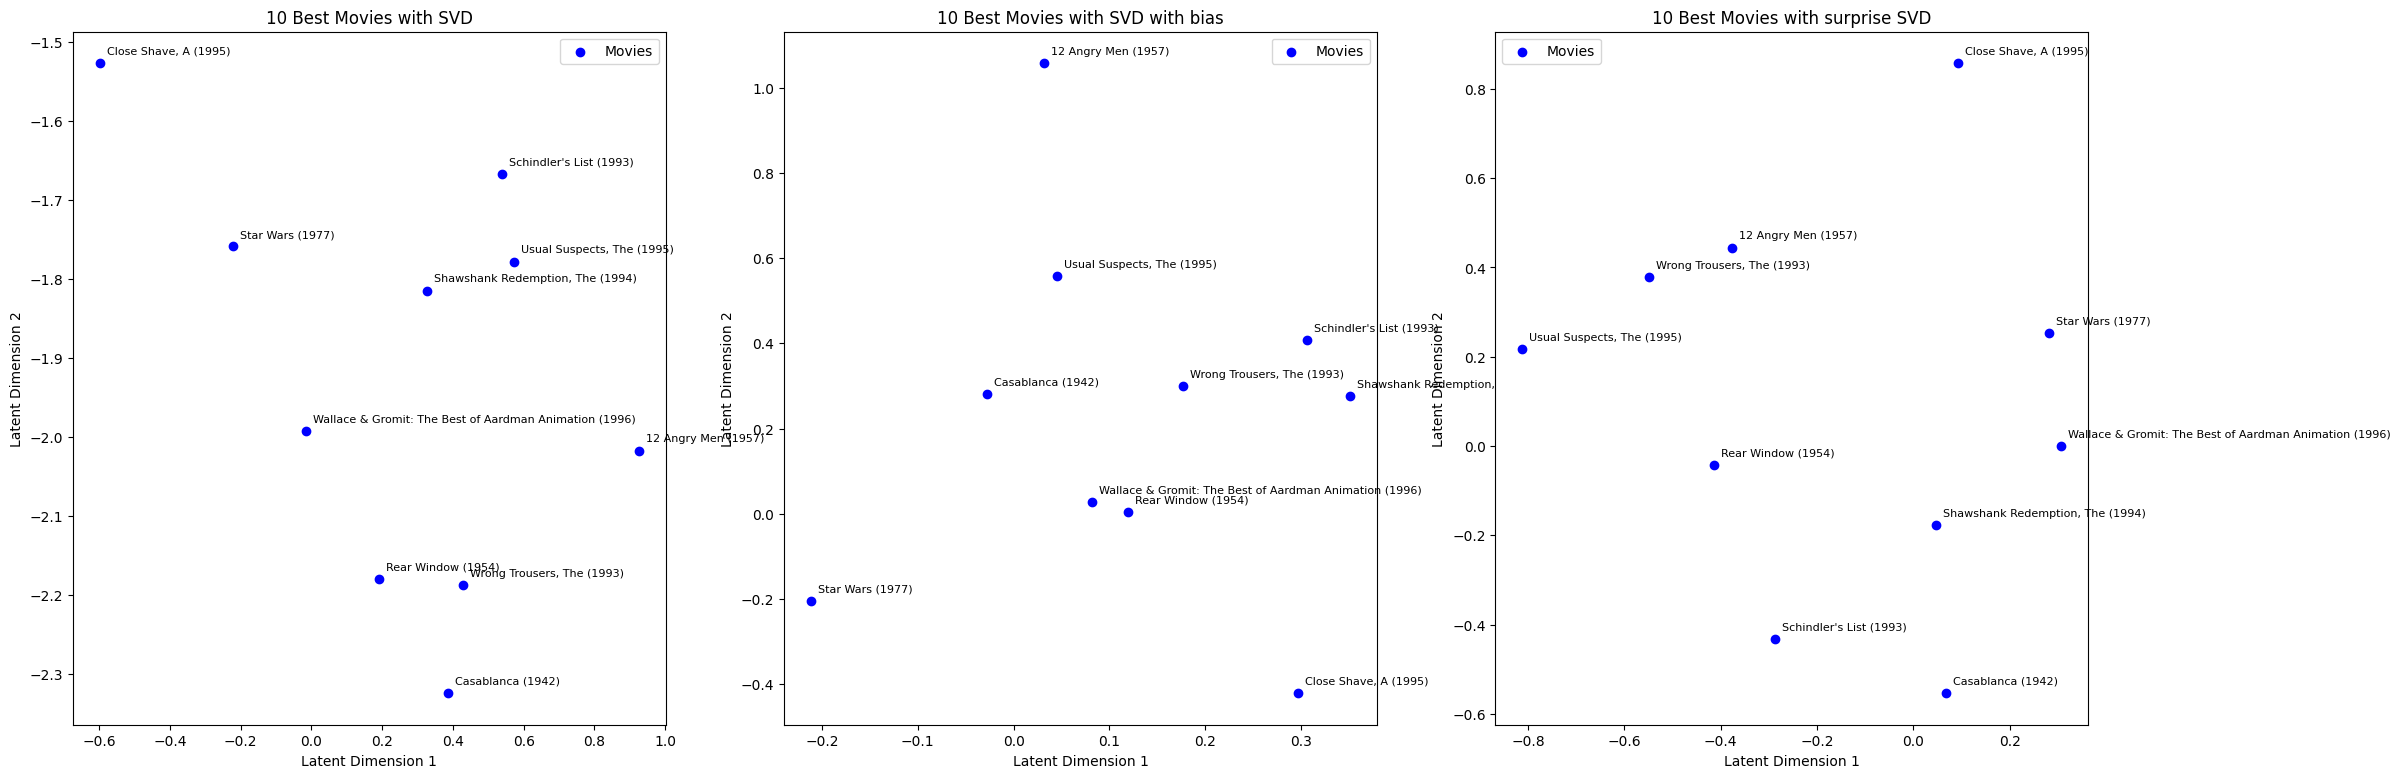

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
best_labels = [movies['Movie Title'][i - 1] for i in movie_ids]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 9))
plot_movies(axes[0], movie_ids, best_labels, "10 Best Movies with SVD", A, V)
plot_movies(axes[1], movie_ids, best_labels, "10 Best Movies with SVD with bias", A_bias, V_bias)
plot_movies(axes[2], movie_ids, best_labels, "10 Best Movies with surprise SVD", A_surprise, V_surprise)

graphs for movies by 3 genres:

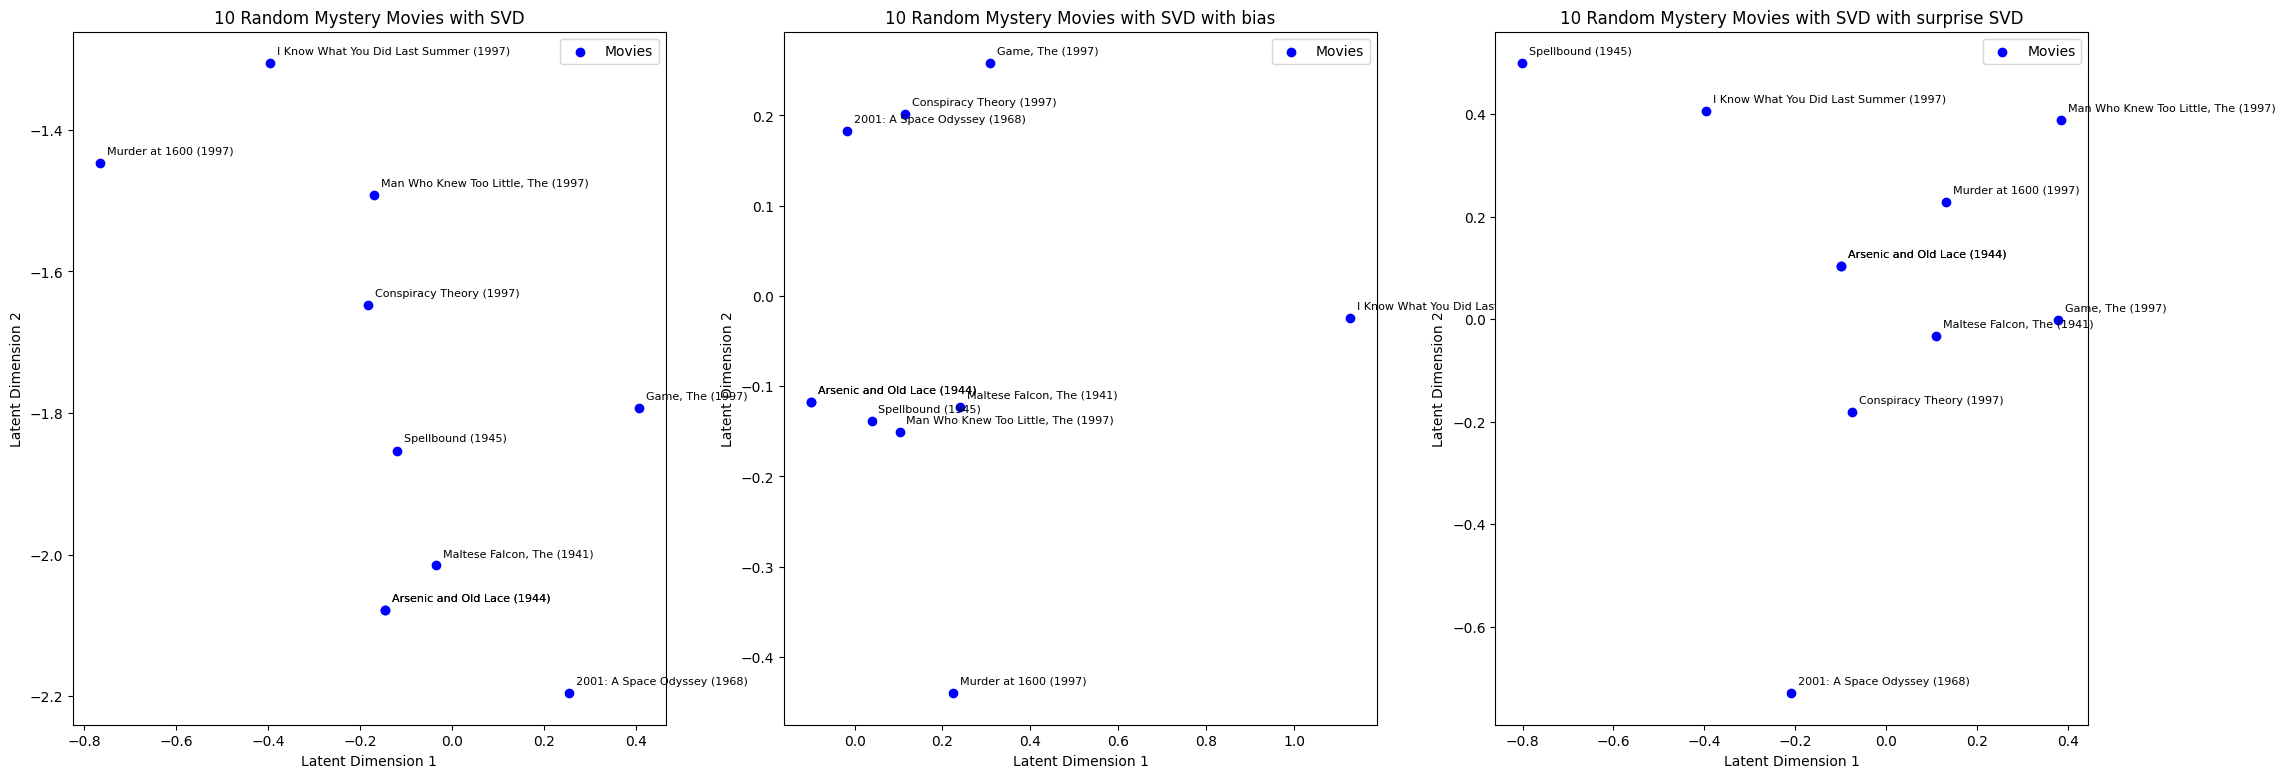

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

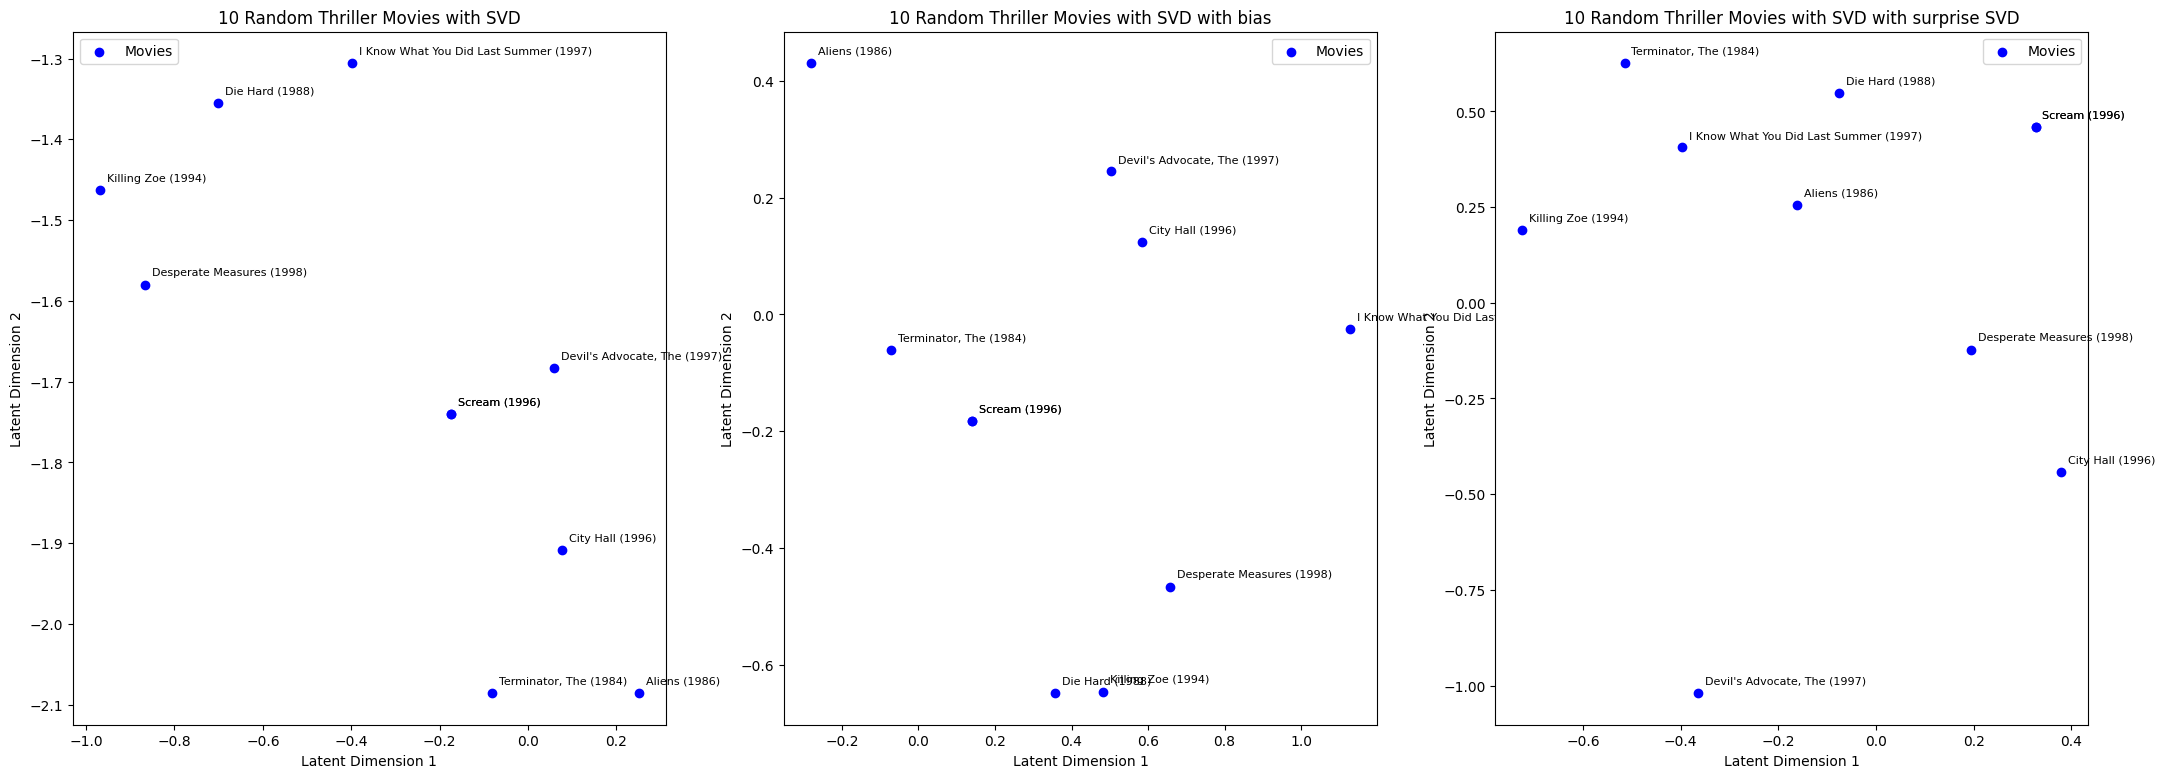

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

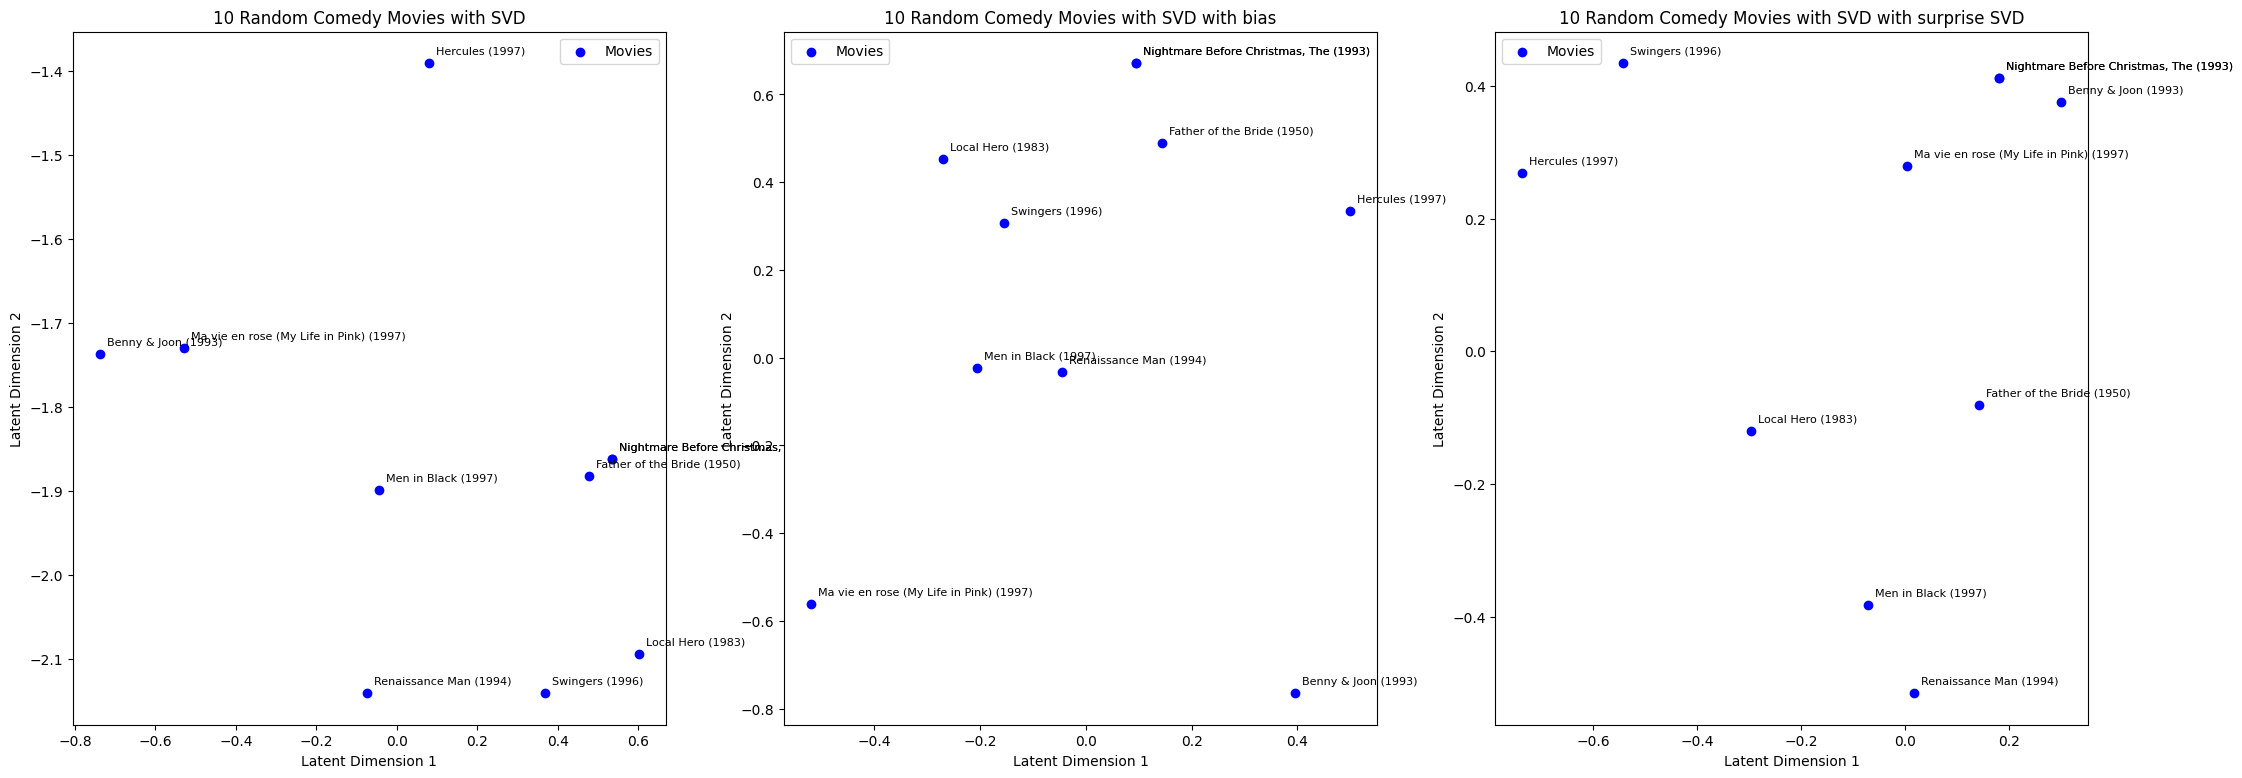

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
genres = ['Mystery', 'Thriller', 'Comedy']

for genre in genres:
    movie_ids = data_movies[data_movies[genre] == 1]['Movie ID']
    random_movie_ids = movie_ids.sample(n=10, random_state=42)
    random_labels = [movies['Movie Title'][i - 1] for i in random_movie_ids]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(26, 9))
    plot_movies(axes[0], random_movie_ids.values, random_labels, f"10 Random {genre} Movies with SVD", A, V)
    plot_movies(axes[1], random_movie_ids.values, random_labels, f"10 Random {genre} Movies with SVD with bias", A_bias, V_bias)
    plot_movies(axes[2], random_movie_ids.values, random_labels, f"10 Random {genre} Movies with SVD with surprise SVD", A_surprise, V_surprise)

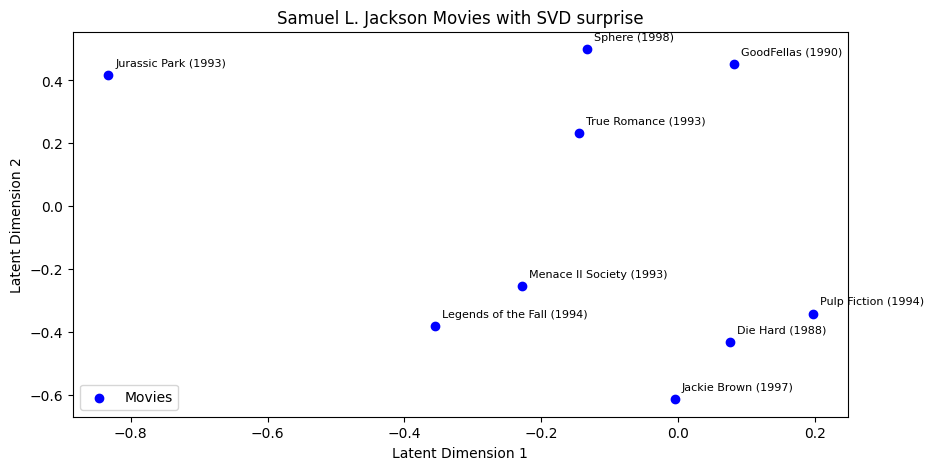

<Figure size 800x600 with 0 Axes>

In [ ]:
samuel_moives_id = [51, 56, 82, 144, 346, 182, 92, 355, 806]
n = len(samuel_moives_id)

samuel_labels = [
    movies.loc[movies['Movie ID'] == movie_id, 'Movie Title'].iloc[0]
    for movie_id in samuel_moives_id
]

idxs_random = np.random.choice(n, size=n, replace=False)
rand_labels = [samuel_labels[i] for i in idxs_random]


fig, ax = plt.subplots(figsize=(10, 5))


plot_movies(ax, idxs_random, rand_labels, "Samuel L. Jackson Movies with SVD surprise", A_surprise, V_surprise)

plt.show()


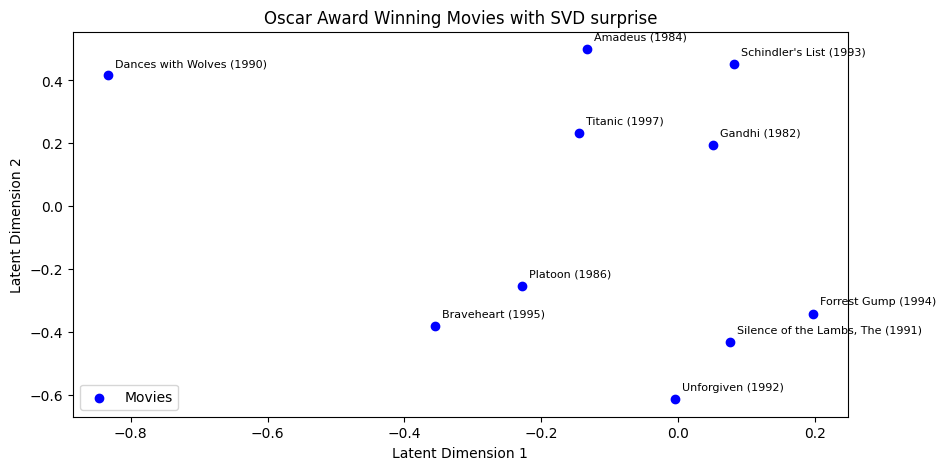

<Figure size 800x600 with 0 Axes>

In [ ]:
oscar_id = [22, 69, 97, 98, 203, 318, 313, 191, 157, 527]
n = len(oscar_id)

oscar_labels = [
    movies.loc[movies['Movie ID'] == movie_id, 'Movie Title'].iloc[0]
    for movie_id in oscar_id
]

idxs_random = np.random.choice(n, size=n, replace=False)
rand_labels = [oscar_labels[i] for i in idxs_random]


fig, ax = plt.subplots(figsize=(10, 5))

plot_movies(ax, idxs_random, rand_labels, "Oscar Award Winning Movies with SVD surprise", A_surprise, V_surprise)

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')